# Data Loading_파일 불러오기

In [37]:
# import module

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [38]:
# read file

file_path = '../data/Raisin_Dataset.xlsx'

data = pd.read_excel(file_path)
df = pd.DataFrame(data)

df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


# Data Loading_그래프로 확인

In [39]:
#import module

import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Classify raisin')

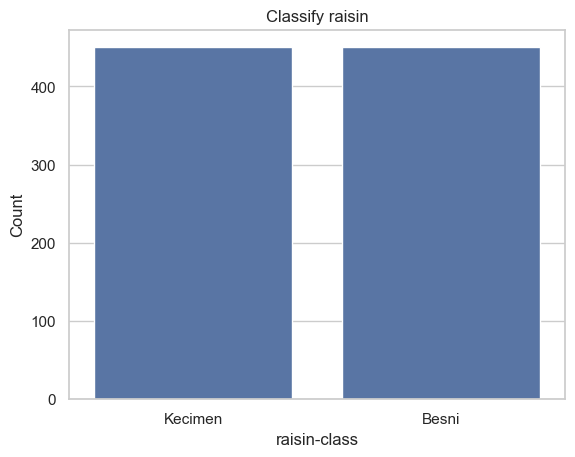

In [40]:
# Check class imbalance with graph

sns.countplot(data = df, x = "Class")
plt.xlabel("raisin-class")
plt.ylabel("Count")
plt.title("Classify raisin")

# Data Cleaning_결측치 제거

In [41]:
# null값이 있는지 확인

df.isnull().sum()

# null값이 있을 경우 dropna()함수로 행 제거할 수 있음
# df = df.dropna()


Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

# Data Cleaning_산점도 확인(outlier)

Text(0.5, 1.0, 'Scatter')

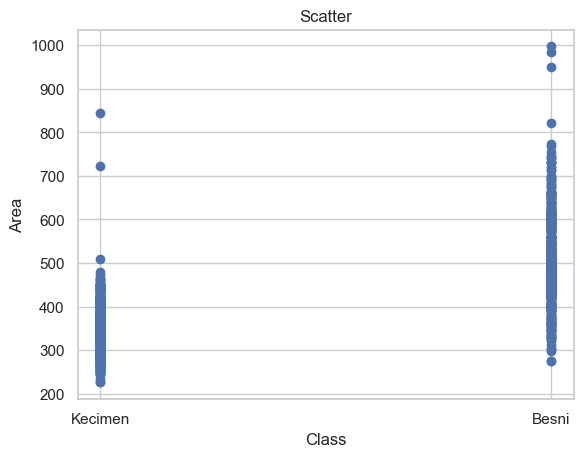

In [42]:
# DataFrame 생성 후 plt로 scatter 그려 outlier 확인

plt.scatter(df['Class'], df['MajorAxisLength'])
plt.xlabel("Class")
plt.ylabel("Area")
plt.title("Scatter")

# Data Cleaning_Boxplot

C:\Users\황주신\AppData\Local\Temp\ipykernel_19868\1574611667.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Perimeter", data = df, palette = "Set3")


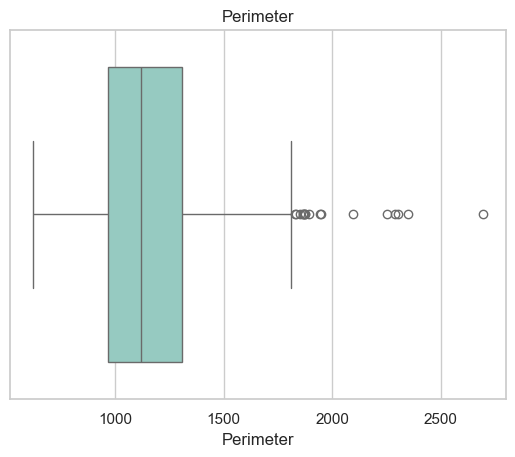

In [43]:
# sns로 boxplot 그려 outlier 확인

sns.set_theme(style = "whitegrid")
sns.boxplot(x = "Perimeter", data = df, palette = "Set3")
plt.title("Perimeter")
plt.show()

# feature와 label 나누기

In [44]:
# split X/Y

X = data.drop('Class', axis = 1)
Y = data["Class"]

# Train 데이터와 Test 데이터 나누기

In [45]:
# split train/test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Data Scaling

In [46]:
# module import

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [47]:
# MinMaxScaler()를 사용한 data scaling
scaler_minmax = MinMaxScaler()
X_train_scaled = scaler_minmax.fit_transform(X_train)
X_test_scaled = scaler_minmax.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,
                                 index = X_train.index,
                                 columns = X_train.columns) 
X_train_scaled_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
304,0.184999,0.157390,0.259104,0.620898,0.189417,0.715254,0.202937
831,0.116856,0.068655,0.236393,0.362349,0.118563,0.613334,0.138637
240,0.130296,0.126677,0.191013,0.660983,0.135523,0.710475,0.159246
1,0.251806,0.250073,0.283078,0.752177,0.260489,0.648235,0.290089
439,0.369764,0.223931,0.520970,0.321724,0.368806,0.758048,0.331707


In [48]:
#StandardScaler()를 사용한 data scaling
scaler_standard = StandardScaler()
X_train_scaled = scaler_standard.fit_transform(X_train)
X_test_scaled = scaler_standard.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,
                                 index = X_train.index,
                                 columns = X_train.columns) 
X_train_scaled_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
304,-0.654881,-0.788127,-0.387301,-0.646529,-0.652248,0.237536,-0.714044
831,-1.002938,-1.355632,-0.545029,-2.384134,-1.009561,-0.581979,-1.131498
240,-0.934288,-0.984547,-0.860188,-0.377134,-0.924032,0.199114,-0.997699
1,-0.313646,-0.195373,-0.220808,0.235747,-0.293837,-0.301350,-0.148218
439,0.288858,-0.362565,1.431332,-2.657158,0.252400,0.581641,0.121980


# 모델 학습시키고 평가하기

In [49]:
# make model

raisin_ml = LogisticRegression(random_state=0)
raisin_ml_scaled = LogisticRegression(random_state=0)

# fit model
raisin_ml.fit(X_train, Y_train)
raisin_ml_scaled.fit(X_train_scaled, Y_train)


LogisticRegression(random_state=0)

In [50]:
# test model (Not scaled)

pred_raisin = raisin_ml.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(Y_test, pred_raisin))
print (confusion_matrix(Y_test, pred_raisin))


--- Logistic Regression Classifier ---
0.9055555555555556
[[87 10]
 [ 7 76]]


In [51]:
# test model (Scaled)

pred_raisin_scaled = raisin_ml_scaled.predict(X_test_scaled)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(Y_test, pred_raisin_scaled))
print (confusion_matrix(Y_test, pred_raisin_scaled))


--- Logistic Regression Classifier ---
0.8944444444444445
[[86 11]
 [ 8 75]]
